## Jacob Linder
<p>I have a pretty good background in stocks and options, which will make it easier for our group get an idea of what information is important and which may be worth discarding. Additionally, I bring relevant python experience to the table, having worked with options data scraped from APIs in the past, which will allow us to get relevant options data for each post. I also have a lot of personal project based experience with Linux, which will be handy if we want to set this running on a server to continually collect data and make observations.</p>

<p> ADD IN: What areas/skills/domains does the team member presently identify with?
    Into which areas/skills/domains would the team member like to grow? </p>


## Logan Stout
<p>I am a hobby investor trading options profitably for the last four years. With my experience, I have a soild grasp on the mechanisms by which securities and their option prices develop as a result of market movements, statistics, and media. As a controls engineer by trade, I have a handle on control systems and managing system outputs based on constantly changing updated data. My strengths include high level project planning and file processing. By approaching this project with the data being mixed with other text in a forum, I hope to gain experience in web scraping and text parsing.</p>

### Who might be interested?
<p>The purpose of our data is to be able to observe if the community at WallStreetBets is actually having any impact on the stocks they suggest, in aggregate. Additionally, we intend to quantify the accuracy of the communities suggestions as a whole by comparing the prices of the underlying equities at the expiry of the contract to the strike of the suggested contract. We will increase the accuracy of our quantification by including the price of the equity at the time of the post. </p>
<p>If there is some measure of effect (or even accuracy) to the predicitons on WSB, any trader or alogrithmic trading firm would be eager to incorporate that information into their programs.</p>

### How is the data limited?
<p>The core of the data collection method is scraping text from posts and comments on Reddit in search of stock market positions. This is simple for the ideal case, where a given comment will have a string of text in the format of the stock ticker, date, strike price, and option type (put or call). PSTH 3/19/21 20c, for example, would be a relatively simple string to parse as it provides all of the required information in sequence. Unfortunately, no standardized format is enforced; this means that the same information could be communicated by any permutation containing all four items or even using full sentences with context elsewhere in the post. By not having adequately sophisticated parsing, it is probable that the amount of data collected will be significantly less than what is totally available. 
</p>

### How was the data created?
<p>All of the position data came from anonymously submitted posts and comments on Reddit.com/r/wallstreetbets. Individual stock data is generated by investors making trades on the stock market, most commonly the New York Stock Exchange and the Nasdaq Stock Market. The specific data used is taken from Yahoo Finance quotes, which receives it from a company called ICE Data Service, who takes it from the exchanges themselves.</p>

### What access rights exist on your data? How will you make your data available?
<p> Currently, there are no obvious restrictions on data usage or collection. Any internet connection can access both Reddit and Yahoo Finance without even having a registered account. However, Reddit may have some control over the content posted on their website, and Yahoo may restrict their data from being used for commercial purposes (figure we should check).</p>
<p> We will make the data available originally as a simple bulk JSON file of all the suggestions make on WSB, as well as the post text connected to that suggestion. Additionally, we intend to compute an aggregated "sentiment" of WSB, as measured by number and direction of suggestions, combined with the number of upvotes and comments on the posts themselves. Further down the line, we would like to present the data by ticker, rating current WSB sentiment as well as the historic amount of sway WSB has had over a particular stock, if available. </p>

In [1]:
import requests
import json
import datetime
import time

In [2]:
after_time = datetime.datetime(2020,1,15,0,0).timestamp()
after_time = int(after_time)
stop_time = int(datetime.datetime(2020,1,20,0,0).timestamp())

all_posts = requests.get('https://api.pushshift.io/reddit/submission/search/?after={}&sort_type=created_utc&sort=asc&subreddit=wallstreetbets&size=150'.format(after_time))
data = all_posts.json()

good_flairs = ['DD','Options','Stocks','Fundamentals','Technicals','YOLO','Discussion']
good_posts = []
max_time = 0
all_posts

<Response [200]>

In [3]:

while (after_time <= stop_time):
    for post_dict in data['data']:
        try:
            post_dict['link_flair_text']
        except KeyError:
            continue
        if post_dict['link_flair_text'] in good_flairs:
            good_posts.append(post_dict)
            if post_dict['created_utc'] > max_time:
                max_time = post_dict['created_utc']
    #recalculate new time to get next 100 posts
    after_time = after_time + (max_time - after_time)
    time.sleep(2) # not including this got us shutdown by the API
    all_posts = requests.get('https://api.pushshift.io/reddit/submission/search/?after={}&sort_type=created_utc&sort=asc&subreddit=wallstreetbets&size=150'.format(after_time))
    data = all_posts.json()
    
    # write to file
    # record max time

In [4]:
len(good_posts)

641

In [5]:
import yfinance as yf # to be used for stock data

In [6]:
msft = yf.Ticker("MSFT")
msft.history(period="max")
# we can get any prices we need from this API, including that days option chain if we want

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1986-03-13,0.056514,0.064825,0.056514,0.062055,1031788800,0.0,0.0
1986-03-14,0.062055,0.065379,0.062055,0.064271,308160000,0.0,0.0
1986-03-17,0.064271,0.065933,0.064271,0.065379,133171200,0.0,0.0
1986-03-18,0.065379,0.065933,0.063163,0.063717,67766400,0.0,0.0
1986-03-19,0.063717,0.064271,0.062055,0.062609,47894400,0.0,0.0
...,...,...,...,...,...,...,...
2020-10-05,207.220001,210.410004,206.979996,210.380005,21331600,0.0,0.0
2020-10-06,208.820007,210.179993,204.820007,205.910004,28554300,0.0,0.0
2020-10-07,207.059998,210.110001,206.720001,209.830002,25681100,0.0,0.0


In [24]:
# Demonstration with some posts (using the api call for specific submissions)
demo_post = requests.get('https://api.pushshift.io/reddit/search/submission/?ids=j5vmr4').json()['data'][0]

In [25]:
demo_post['selftext']

'Current play: SPY 344c 10/14\n\nMonday, October 5, 2020: What happened to SPY today?\n\n1 hr Chart\nSPY leaped to a great start on positive news of Trumps health. Spy continued its uptrend that was started on Sept. 24 and broke out of its bearish channel that began on Sept. 3rd. However it continues it’s upward momentum through its horizontal Chanel. 5 and 3 min. charts confirm.\n\n1 min. Chart \nOur current  (6pm EST) support is at 338.51 and we’re hugging 339.89 resistance. \n\n\n5 min. Chart.\nOur current support (6pm EST) support is at 337.94.\n\nOctober 6, 2020 Forecast\nI’m forecasting to hit somewhere near 342.65. It may bounce off it horizontal resistance line and continue its consolidation trend. If we have very positive news on stimulus talks and the Presidents health, we could see it breakthrough it’s horizontal channel and continue its uptrend.\n\nBullish targets: 342.65 - 347.93 - 356.34\nBearish Targets: 336.09 - 330.95 - 321.42\n\nhttps://imgur.com/a/jvdRcj4'

In [26]:
## regex attempt
import re
def regex_pos(post_text):
    x1 = re.findall('[A-Z]{1,4}\s\d{1,3}[cCpP]\s\d{1,2}/\d{1,4}', post_text)
    if x1: return x1
    x2 = re.findall('[A-Z]{1,4}\s\d{1,2}\/\d{1,2}\s\d{1,3}[cCpP]', post_text)
    if x2: return x2
    
    return []
        

regex_pos(demo_post['selftext'])

['SPY 344c 10/14']

In [18]:
## nltk attempt - requires setup of nltk first. 
## after installing nltk with either pip or conda:
## import nltk
## nltk.download()
## use the gui to download and install all the packages, the directory is not important. 

from nltk.corpus import stopwords
from nltk import FreqDist
import collections
import string

def clean_post(post_text):
    translator = str.maketrans('', '', string.punctuation) # for removing punctuation
    post_text = post_text.translate(translator)
    token_text = [t for t in post_text.replace('\n',' ').split()]
    
    sr = stopwords.words('english')
    cleanTokens = [i for i in token_text if i not in sr]
    
    return cleanTokens

freq = FreqDist(clean_post(demo_post['selftext']))

freq.most_common(10)

# use this plot to get the ticker  to focus on. getting positions in this case is a work in progress. 
# best idea is to find instances of the ticker in the text, and then check the rest of the sentence for common 
# position data formats. Like '100c 10/16' or 'oct. 16 100 calls', etc. 

[('SPY', 3),
 ('5', 3),
 ('Chart', 3),
 ('horizontal', 3),
 ('min', 3),
 ('support', 3),
 ('October', 2),
 ('2020', 2),
 ('1', 2),
 ('positive', 2)]

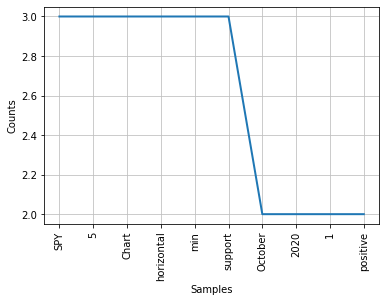

In [13]:
freq.plot(10, cumulative=False)

In [29]:
## with another demo post
demo_post = requests.get('https://api.pushshift.io/reddit/search/submission/?ids=j70ewz').json()['data'][0]
demo_post['selftext']

'Link to last forecast: [https://www.reddit.com/r/wallstreetbets/comments/j6mj5w/tomorrows\\_spy\\_forecast\\_still\\_bullish/?utm\\_source=share&amp;utm\\_medium=web2x&amp;context=3](https://www.reddit.com/r/wallstreetbets/comments/j6mj5w/tomorrows_spy_forecast_still_bullish/?utm_source=share&amp;utm_medium=web2x&amp;context=3)\n\nFind what my current plays and plays i\'m thinking about for spy at the very bottom. \n\nRecap:\n\nToday\'s prediction (found in the link above): "My take is that SPY is still bullish and we will close tomorrow .5-1.5% above open probably around 335.20 marker."\n\nSpy closed better than expected at 1.74%. Spy stayed in it\'s bullish channel that formed in early Sept. but stayed within it\'s consolidation channel that formed in early Sept (same news, different day.)\n\nhttps://preview.redd.it/cnswqz65qqr51.png?width=4096&amp;format=png&amp;auto=webp&amp;s=87dd71fa3170f279e5186516a36a2cf97e281a62\n\nVolume was way down all day from avg. but we made a steady cl

In [30]:
## regex
regex_pos(demo_post['selftext']) # grabs the second regex in the function

['SPY 10/14 344c']

In [31]:
## nltk

freq = FreqDist(clean_post(demo_post['selftext']))

freq.most_common(10)

[('342', 5),
 ('If', 4),
 ('plays', 3),
 ('SPY', 3),
 ('day', 3),
 ('current', 2),
 ('My', 2),
 ('bullish', 2),
 ('tomorrow', 2),
 ('Spy', 2)]

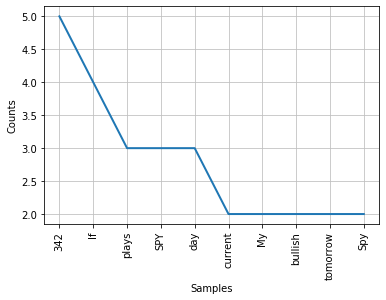

In [32]:
freq.plot(10, cumulative=False)